In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hades\Anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         2.8 MB
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0

The following packages will be UPDATED:

  conda                                       4.7.10-py37_0 --> 4.8.2-py37_0




missingno-0.4.1      | 10 KB     |            |   0% 
missingno-0.4.1      | 10 KB     | ########## | 100% 

conda-4.8.2          | 2.8 MB    |            |   0% 
conda-4.8.2

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [3]:
#https://datos.gob.mx/busca/dataset/pacientes-en-espera-de-un-organo-o-tejido-al-31-de-diciembre-de-2019
path = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\Pacientes_en_espera.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,SEXO,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,ESTADO_DE_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,ESTADO_DE_RESIDENCIA_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
0,FEMENINO,2,O,POSITIVO,1946-09-07,2002-02-12,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,99,NO DISPONIBLE,99
1,MASCULINO,1,O,POSITIVO,1984-11-15,2002-02-12,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,99,NO DISPONIBLE,99
2,FEMENINO,2,O,NEGATIVO,2002-01-01,2002-02-25,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,99,NO DISPONIBLE,99
3,FEMENINO,2,O,POSITIVO,2002-02-01,2002-03-27,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,99,NO DISPONIBLE,99
4,FEMENINO,2,O,NEGATIVO,2002-05-01,2002-05-05,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,99,NO DISPONIBLE,99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23277 entries, 0 to 23276
Data columns (total 16 columns):
SEXO                                             23277 non-null object
CODIGO_SEXO                                      23277 non-null int64
GRUPO_SANGUINEO                                  23277 non-null object
RH                                               23277 non-null object
FECHA_NACIMIENTO                                 23277 non-null object
FECHA_REGISTRO_COMITE                            23277 non-null object
ORGANO                                           23277 non-null object
ORIGEN_INJERTO                                   23277 non-null object
ESTABLECIMIENTO                                  23277 non-null object
INSTITUCION                                      23277 non-null object
ENTIDAD_FEDERATIVA_ESTABLECIMIENTO               23277 non-null object
CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO        23277 non-null int64
ESTADO_DE_ORIGEN_PACIENTE                

In [5]:
df.shape

(23277, 16)

In [6]:
df.shape[0]

23277

In [7]:
df.shape[1]

16

In [8]:
df.columns.values.tolist()

['SEXO',
 'CODIGO_SEXO',
 'GRUPO_SANGUINEO',
 'RH',
 'FECHA_NACIMIENTO',
 'FECHA_REGISTRO_COMITE',
 'ORGANO',
 'ORIGEN_INJERTO',
 'ESTABLECIMIENTO',
 'INSTITUCION',
 'ENTIDAD_FEDERATIVA_ESTABLECIMIENTO',
 'CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO',
 'ESTADO_DE_ORIGEN_PACIENTE',
 'CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE',
 'ESTADO_DE_RESIDENCIA_PACIENTE',
 'CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE']

In [9]:
df.dtypes

SEXO                                             object
CODIGO_SEXO                                       int64
GRUPO_SANGUINEO                                  object
RH                                               object
FECHA_NACIMIENTO                                 object
FECHA_REGISTRO_COMITE                            object
ORGANO                                           object
ORIGEN_INJERTO                                   object
ESTABLECIMIENTO                                  object
INSTITUCION                                      object
ENTIDAD_FEDERATIVA_ESTABLECIMIENTO               object
CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO         int64
ESTADO_DE_ORIGEN_PACIENTE                        object
CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE         int64
ESTADO_DE_RESIDENCIA_PACIENTE                    object
CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE     int64
dtype: object

In [10]:
df.isnull().any().any()

False

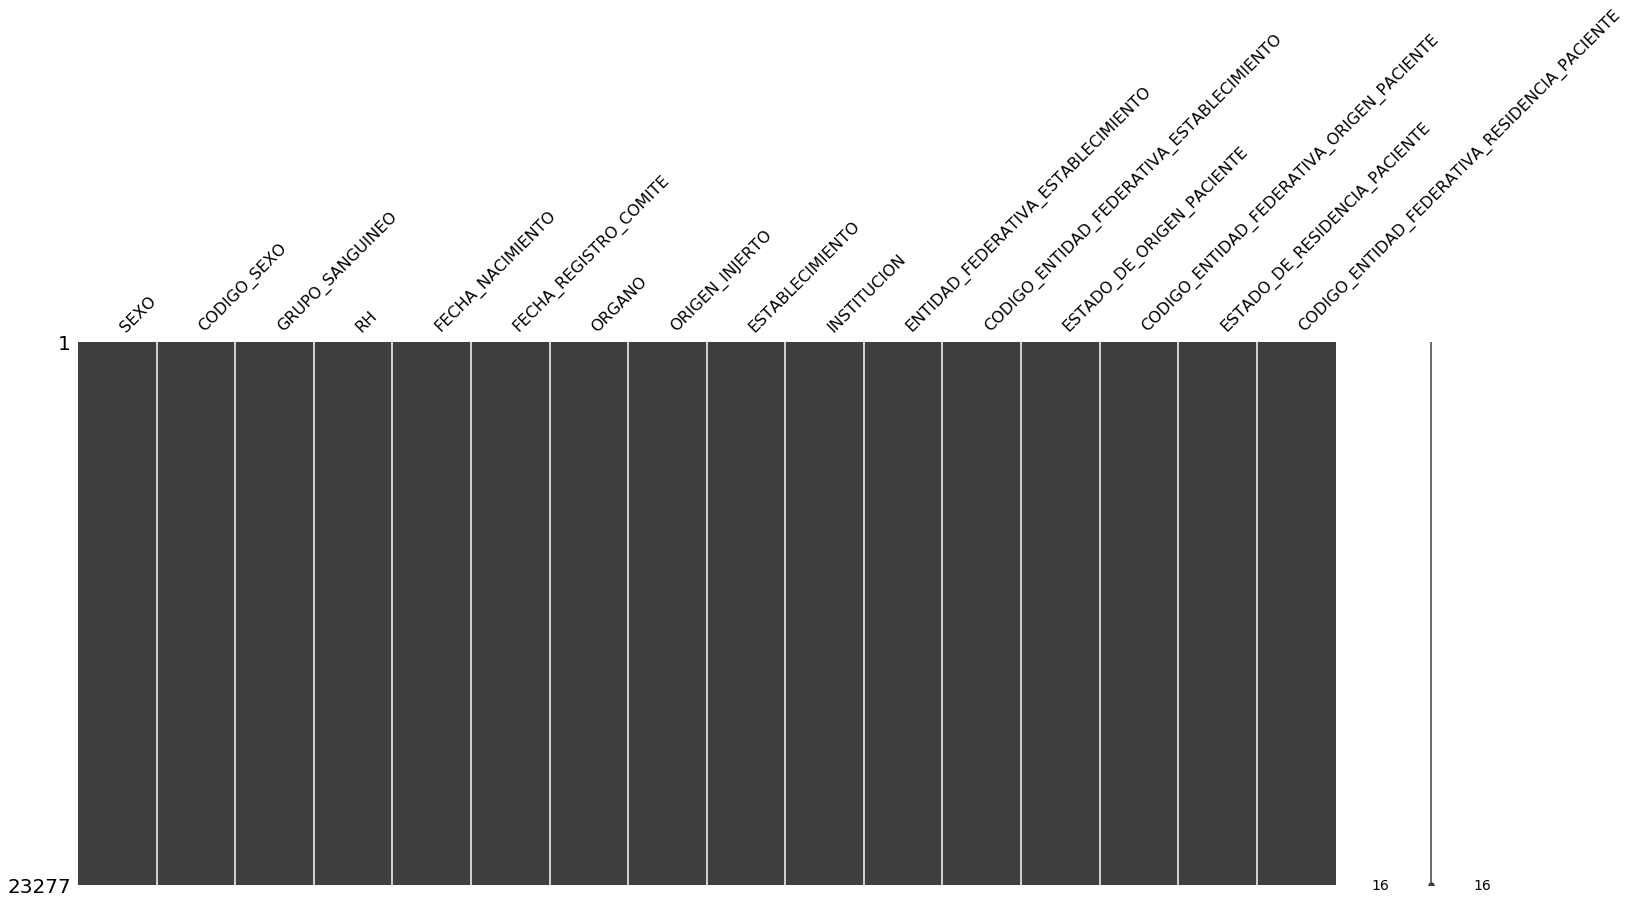

In [11]:
msno.matrix(df)

In [12]:
df.replace({'NO DISPONIBLE': np.nan}, inplace=True)

In [13]:
df.isnull().any().any()

True

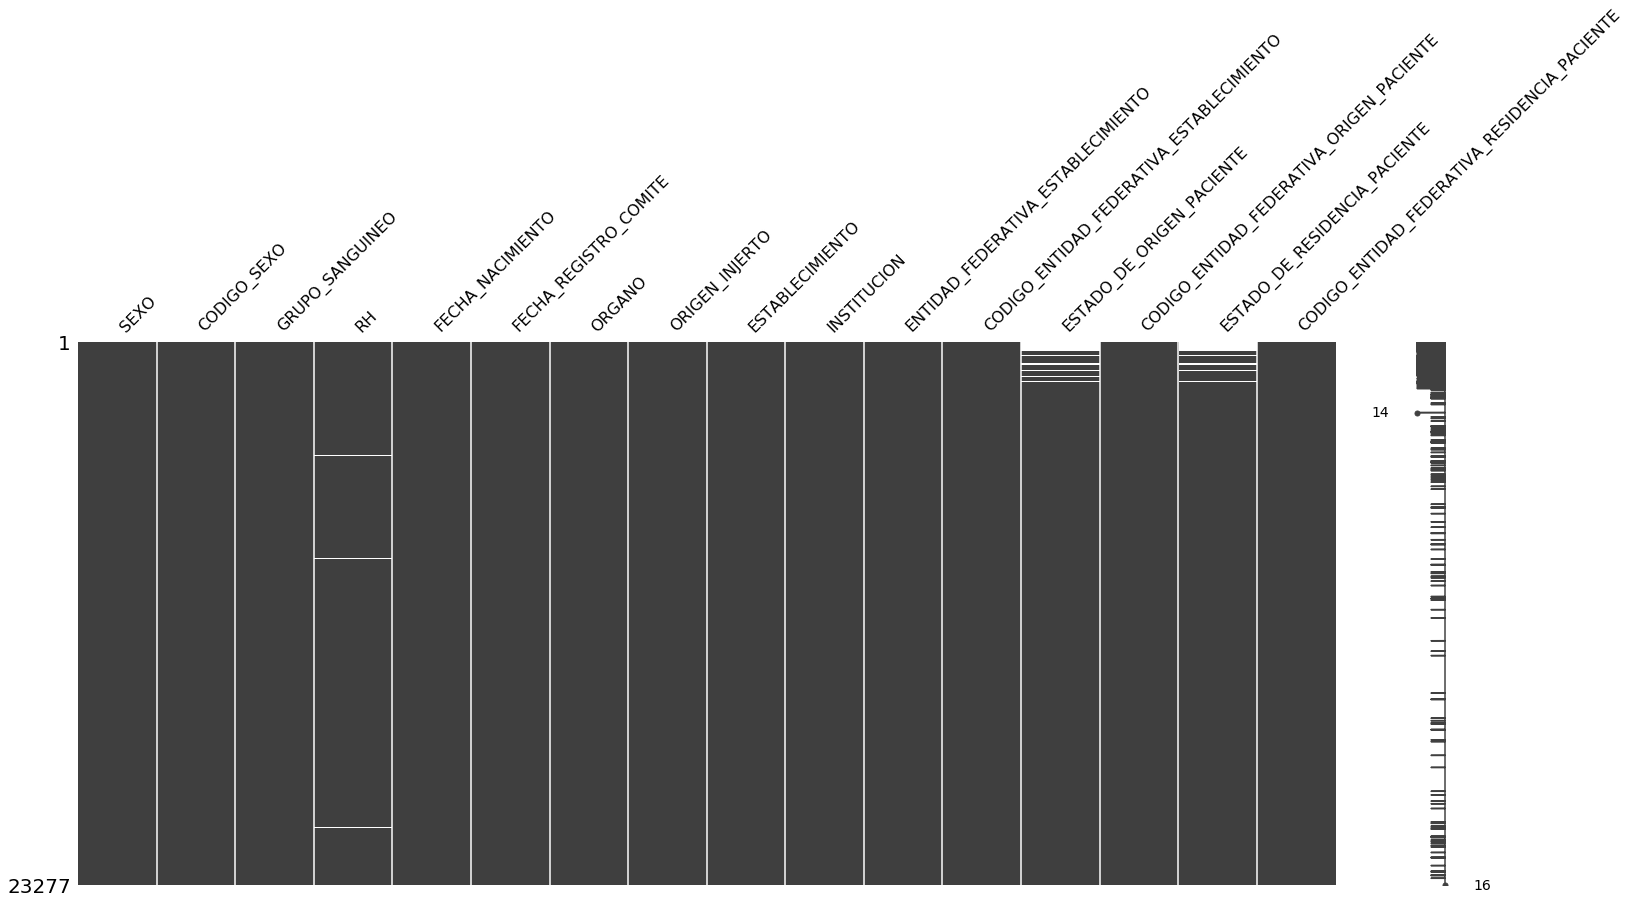

In [14]:
msno.matrix(df)

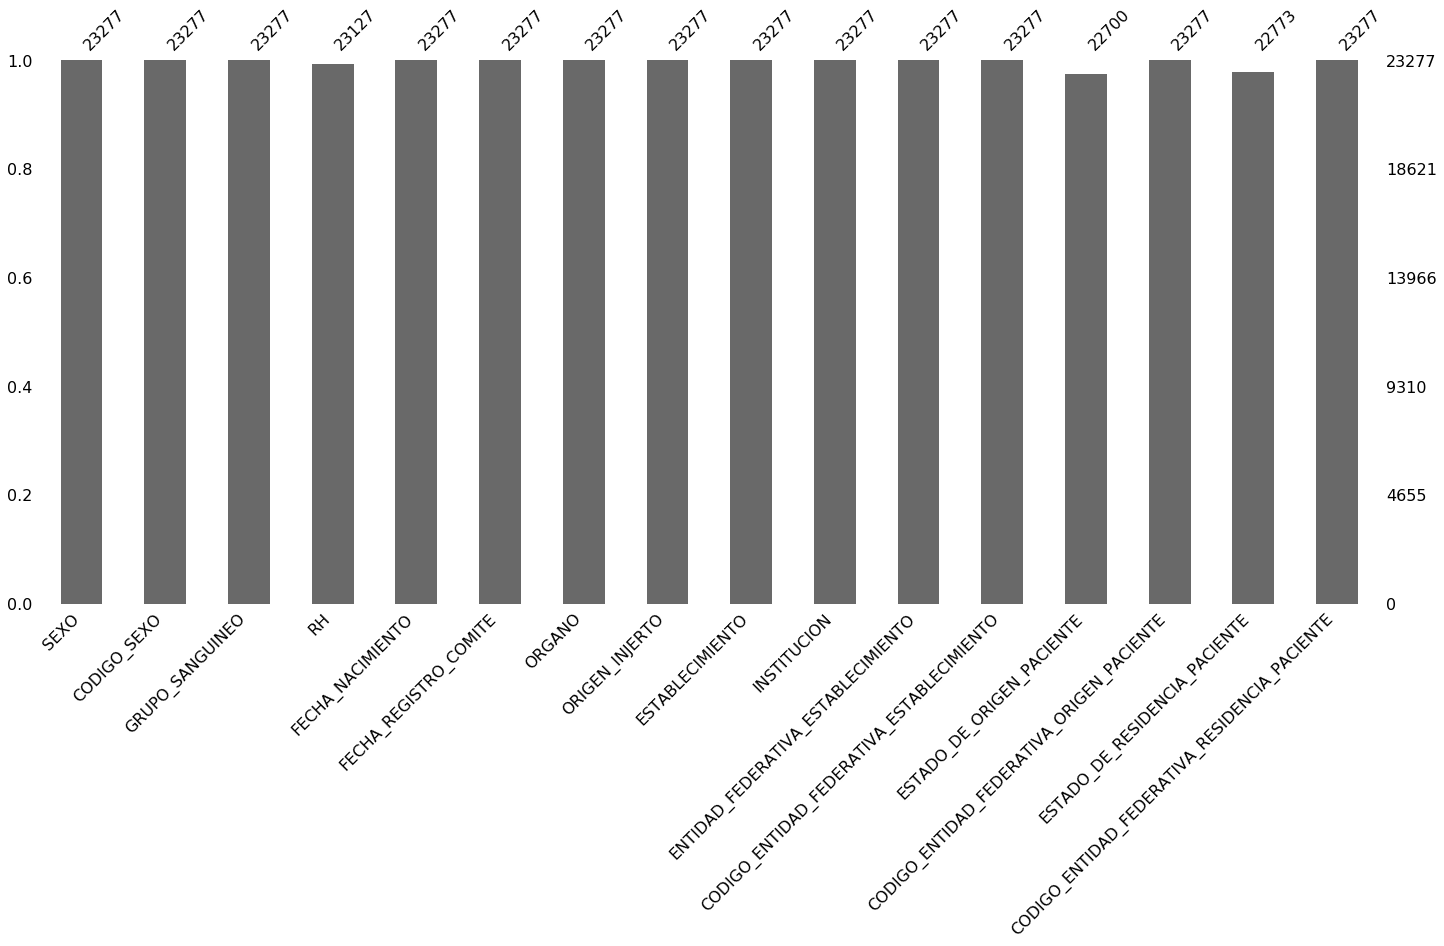

In [15]:
msno.bar(df)

In [16]:
df.columns[df.isnull().any()].tolist()

['RH', 'ESTADO_DE_ORIGEN_PACIENTE', 'ESTADO_DE_RESIDENCIA_PACIENTE']

In [17]:
df.describe()

,CODIGO_SEXO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
count,23277.000000,23277.000000,23277.000000,23277.000000
mean,1.417708,13.295184,17.659621,17.124629
std,0.493192,6.539806,15.255734,14.219956
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,9.000000,10.000000,10.000000
50%,1.000000,11.000000,14.000000,14.000000
75%,2.000000,15.000000,21.000000,21.000000
max,2.000000,32.000000,99.000000,99.000000


In [18]:
df.loc[[0]]

,SEXO,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,ESTADO_DE_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,ESTADO_DE_RESIDENCIA_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
0,FEMENINO,2,O,POSITIVO,1946-09-07,2002-02-12,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99


In [19]:
df.loc[30:33]

,SEXO,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,ESTADO_DE_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,ESTADO_DE_RESIDENCIA_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
30,FEMENINO,2,O,POSITIVO,1975-11-17,2001-07-16,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,JALISCO,14
31,FEMENINO,2,O,POSITIVO,1970-07-07,2001-06-27,RIÑÓN,CADAVER,U.M.A.E. HOSPITALES DE ESPECIALIDADES DEL CENT...,IMSS,CIUDAD DE MÉXICO,9,NaN,99,NaN,99
32,MASCULINO,1,O,POSITIVO,1983-01-28,2001-05-14,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,JALISCO,14,JALISCO,14
33,MASCULINO,1,N/D,N/D,1989-09-28,2002-10-10,CÓRNEA,CADAVER,"HOSPITAL CIVIL ""DR. JUAN I. MENCHACA"" (GUADALA...",SSE,JALISCO,14,NaN,99,NaN,99


In [20]:
df.ORGANO.values

array(['RIÑÓN', 'RIÑÓN', 'RIÑÓN', ..., 'CÓRNEA', 'RIÑÓN', 'RIÑÓN'],
      dtype=object)

In [21]:
df['ORGANO'].values

array(['RIÑÓN', 'RIÑÓN', 'RIÑÓN', ..., 'CÓRNEA', 'RIÑÓN', 'RIÑÓN'],
      dtype=object)

In [22]:
df.ORGANO.unique()

array(['RIÑÓN', 'CÓRNEA', 'HÍGADO', 'C.P.H.', 'CORAZÓN', 'PARATIROIDES',
       'RIÑÓN-RIÑÓN', 'MANO', 'EXTREMIDADES', 'BANCO CORNEAS',
       'RIÑÓN-PÁNCREAS', 'PÁNCREAS', 'HÍGADO-RIÑÓN', 'CORAZÓN-PULMÓN',
       'PIEL', 'CARA', 'PULMÓN'], dtype=object)

In [23]:
df.ORGANO.value_counts()

RIÑÓN             17069
CÓRNEA             5713
HÍGADO              317
C.P.H.               95
CORAZÓN              43
PARATIROIDES         11
RIÑÓN-RIÑÓN           7
PÁNCREAS              5
PULMÓN                4
HÍGADO-RIÑÓN          3
BANCO CORNEAS         3
RIÑÓN-PÁNCREAS        2
PIEL                  1
CARA                  1
MANO                  1
EXTREMIDADES          1
CORAZÓN-PULMÓN        1
Name: ORGANO, dtype: int64

In [24]:
df.agg(['count', 'size', 'nunique'])

,SEXO,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,ESTADO_DE_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,ESTADO_DE_RESIDENCIA_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
count,23277,23277,23277,23127,23277,23277,23277,23277,23277,23277,23277,23277,22700,23277,22773,23277
size,23277,23277,23277,23277,23277,23277,23277,23277,23277,23277,23277,23277,23277,23277,23277,23277
nunique,2,2,10,4,14315,3487,17,2,274,8,32,32,33,34,33,34


In [25]:
df.groupby('ORGANO').agg(['count', 'size', 'nunique']).stack()

SEXO  CODIGO_SEXO  GRUPO_SANGUINEO     RH  \
ORGANO                                                               
BANCO CORNEAS  count        3            3                3      3   
               size         3            3                3      3   
               nunique      2            2                2      2   
C.P.H.         count       95           95               95     83   
               size        95           95               95     95   
               nunique      2            2                6      4   
CARA           count        1            1                1      1   
               size         1            1                1      1   
               nunique      1            1                1      1   
CORAZÓN        count       43           43               43     43   
               size        43           43               43     43   
               nunique      2            2                6      4   
CORAZÓN-PULMÓN count        1            1                1      1   
               size         1            1                1      1   
               nunique      1            1                1      1   
CÓRNEA         count     5713         5713             5713   5581   
               size      5713         5713             5713   5713   
               nunique      2            2                9      4   
EXTREMIDADES   count        1            1                1      1   
               size         1            1                1      1   
               nunique      1            1                1      1   
HÍGADO         count      317          317              317    317   
               size       317          317              317    317   
               nunique      2            2                6      3   
HÍGADO-RIÑÓN   count        3            3                3      3   
               size         3            3                3      3   
               nunique      2            2                2      1   
MANO           count        1            1                1      1   
               size         1            1                1      1   
               nunique      1            1                1      1   
PARATIROIDES   count       11           11               11     11   
               size        11           11               11     11   
               nunique      1            1                3      1   
PIEL           count        1            1                1      1   
               size         1            1                1      1   
               nunique      1            1                1      1   
PULMÓN         count        4            4                4      4   
               size         4            4                4      4   
               nunique      2            2                2      2   
PÁNCREAS       count        5            5                5      5   
               size         5            5                5      5   
               nunique      2            2                2      1   
RIÑÓN          count    17069        17069            17069  17063   
               size     17069        17069            17069  17069   
               nunique      2            2               10      4   
RIÑÓN-PÁNCREAS count        2            2                2      2   
               size         2            2                2      2   
               nunique      2            2                1      1   
RIÑÓN-RIÑÓN    count        7            7                7      7   
               size         7            7                7      7   
               nunique      2            2                2      1   

                        FECHA_NACIMIENTO  FECHA_REGISTRO_COMITE  \
ORGANO                                                            
BANCO CORNEAS  count                   3                      3   
               size                    3                      3   
               nunique                 3      

In [26]:
df.groupby('ORGANO').agg(['count', 'size', 'nunique'])

SEXO                CODIGO_SEXO                 \
                count   size nunique       count   size nunique   
ORGANO                                                            
BANCO CORNEAS       3      3       2           3      3       2   
C.P.H.             95     95       2          95     95       2   
CARA                1      1       1           1      1       1   
CORAZÓN            43     43       2          43     43       2   
CORAZÓN-PULMÓN      1      1       1           1      1       1   
CÓRNEA           5713   5713       2        5713   5713       2   
EXTREMIDADES        1      1       1           1      1       1   
HÍGADO            317    317       2         317    317       2   
HÍGADO-RIÑÓN        3      3       2           3      3       2   
MANO                1      1       1           1      1       1   
PARATIROIDES       11     11       1          11     11       1   
PIEL                1      1       1           1      1       1   
PULMÓN              4      4       2           4      4       2   
PÁNCREAS            5      5       2           5      5       2   
RIÑÓN           17069  17069       2       17069  17069       2   
RIÑÓN-PÁNCREAS      2      2       2           2      2       2   
RIÑÓN-RIÑÓN         7      7       2           7      7       2   

               GRUPO_SANGUINEO                    RH  ...  \
                         count   size nunique  count  ...   
ORGANO                                                ...   
BANCO CORNEAS                3      3       2      3  ...   
C.P.H.                      95     95       6     83  ...   
CARA                         1      1       1      1  ...   
CORAZÓN                     43     43       6     43  ...   
CORAZÓN-PULMÓN               1      1       1      1  ...   
CÓRNEA                    5713   5713       9   5581  ...   
EXTREMIDADES                 1      1       1      1  ...   
HÍGADO                     317    317       6    317  ...   
HÍGADO-RIÑÓN                 3      3       2      3  ...   
MANO                         1      1       1      1  ...   
PARATIROIDES                11     11       3     11  ...   
PIEL                         1      1       1      1  ...   
PULMÓN                       4      4       2      4  ...   
PÁNCREAS                     5      5       2      5  ...   
RIÑÓN                    17069  17069      10  17063  ...   
RIÑÓN-PÁNCREAS               2      2       1      2  ...   
RIÑÓN-RIÑÓN                  7      7       2      7  ...   

               ESTADO_DE_ORIGEN_PACIENTE  \
                                 nunique   
ORGANO                                     
BANCO CORNEAS                          3   
C.P.H.                                23   
CARA                                   1   
CORAZÓN                               14   
CORAZÓN-PULMÓN                         1   
CÓRNEA                                33   
EXTREMIDADES                           1   
HÍGADO                                32   
HÍGADO-RIÑÓN                           3   
MANO                                   1   
PARATIROIDES                           3   
PIEL                                   1   
PULMÓN                                 2   
PÁNCREAS                               5   
RIÑÓN                                 33   
RIÑÓN-PÁNCREAS                         2   
RIÑÓN-RIÑÓN                            4   

               CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE                 \
                                                   count   size nunique   
ORGANO                                                                    
BANCO CORNEAS                                          3      3       3   
C.P.H.                                                95     95      23   
CARA                                                   1      1       1   
CORAZÓN                                               43     43      14   
CORAZÓN-PULMÓN                                   

In [27]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,SEXO,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,ESTADO_DE_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,ESTADO_DE_RESIDENCIA_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
4421,MASCULINO,1,A,POSITIVO,1975-06-18,2013-02-18,RIÑÓN,CADAVER,U.M.A.E. HOSPITAL DE ESPECIALIDADES C.M.N. GRA...,IMSS,PUEBLA,21,PUEBLA,21,PUEBLA,21
17038,MASCULINO,1,O,POSITIVO,1960-10-31,2018-11-02,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,MORELOS,17,JALISCO,14
2055,FEMENINO,2,O,POSITIVO,1989-01-11,2010-08-19,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,JALISCO,14,JALISCO,14
11189,MASCULINO,1,O,POSITIVO,1997-05-31,2017-03-22,RIÑÓN,CADAVER,U.M.A.E. HOSPITALES DE ESPECIALIDADES DEL CENT...,IMSS,CIUDAD DE MÉXICO,9,CHIAPAS,7,CHIAPAS,7
199,MASCULINO,1,O,POSITIVO,1986-11-14,2003-09-18,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99


In [28]:
df.shape

(23277, 16)

In [29]:
df_sample.shape

(1164, 16)

In [30]:
df_dropped = df.dropna(subset=['ESTADO_DE_RESIDENCIA_PACIENTE'])
df_dropped.head()

,SEXO,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,ESTADO_DE_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,ESTADO_DE_RESIDENCIA_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
14,MASCULINO,1,B,POSITIVO,1975-05-30,2002-01-07,RIÑÓN,CADAVER,INSTITUTO NACIONAL DE CIENCIAS MEDICAS Y NUTRI...,SSA,CIUDAD DE MÉXICO,9,MÉXICO,15,MÉXICO,15
30,FEMENINO,2,O,POSITIVO,1975-11-17,2001-07-16,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,JALISCO,14
32,MASCULINO,1,O,POSITIVO,1983-01-28,2001-05-14,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,JALISCO,14,JALISCO,14
50,FEMENINO,2,O,POSITIVO,1953-01-01,2000-10-26,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,JALISCO,14
76,MASCULINO,1,A,POSITIVO,1954-02-18,2000-12-19,RIÑÓN,CADAVER,"FUNDACION SANTOS Y DE LA GARZA EVIA, I.B.P.",PRIVADO,NUEVO LEÓN,19,NUEVO LEÓN,19,NUEVO LEÓN,19


In [31]:
df_dropped.shape

(22773, 16)

In [32]:
df_copy = df.copy()
df_copy.head()

,SEXO,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,ESTADO_DE_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,ESTADO_DE_RESIDENCIA_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
0,FEMENINO,2,O,POSITIVO,1946-09-07,2002-02-12,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99
1,MASCULINO,1,O,POSITIVO,1984-11-15,2002-02-12,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99
2,FEMENINO,2,O,NEGATIVO,2002-01-01,2002-02-25,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99
3,FEMENINO,2,O,POSITIVO,2002-02-01,2002-03-27,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99
4,FEMENINO,2,O,NEGATIVO,2002-05-01,2002-05-05,RIÑÓN,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99


In [33]:
df_copy.shape

(23277, 16)

In [34]:
df_dropped['ORGANO'].dtype

dtype('O')

In [35]:
list(df['ORGANO'].unique())

['RIÑÓN',
 'CÓRNEA',
 'HÍGADO',
 'C.P.H.',
 'CORAZÓN',
 'PARATIROIDES',
 'RIÑÓN-RIÑÓN',
 'MANO',
 'EXTREMIDADES',
 'BANCO CORNEAS',
 'RIÑÓN-PÁNCREAS',
 'PÁNCREAS',
 'HÍGADO-RIÑÓN',
 'CORAZÓN-PULMÓN',
 'PIEL',
 'CARA',
 'PULMÓN']

In [36]:
"""
1 RIÑÓN
2 CÓRNEA
3 HÍGADO
4 C.P.H.
5 CORAZÓN
6 PARATIROIDES
7 RIÑÓN-RIÑÓN
8 MANO
9 EXTREMIDADES
10 BANCO CORNEAS
11 RIÑÓN-PÁNCREAS
12 PÁNCREAS
13 HÍGADO-RIÑÓN
14 CORAZÓN-PULMÓN
15 PIEL
16 CARA
17 PULMÓN
"""
df['ORGANO'].replace({1:"RIÑÓN",
2:"CÓRNEA",
3:"HÍGADO",
4:"C.P.H.",
5:"CORAZÓN",
6:"PARATIROIDES",
7:"RIÑÓN-RIÑÓN",
8:"MANO",
9:"EXTREMIDADES",
10:"BANCO CORNEAS",
11:"RIÑÓN-PÁNCREAS",
12:"PÁNCREAS",
13:"HÍGADO-RIÑÓN",
14:"CORAZÓN-PULMÓN",
15:"PIEL",
16:"CARA",
17:"PULMÓN"}, inplace=True)


In [37]:
list(df['ORGANO'].unique())

['RIÑÓN',
 'CÓRNEA',
 'HÍGADO',
 'C.P.H.',
 'CORAZÓN',
 'PARATIROIDES',
 'RIÑÓN-RIÑÓN',
 'MANO',
 'EXTREMIDADES',
 'BANCO CORNEAS',
 'RIÑÓN-PÁNCREAS',
 'PÁNCREAS',
 'HÍGADO-RIÑÓN',
 'CORAZÓN-PULMÓN',
 'PIEL',
 'CARA',
 'PULMÓN']

In [38]:
keys = list(df['ORGANO'].unique())
vals = range(1,18)
act = dict(zip(keys, vals))
act

{'RIÑÓN': 1,
 'CÓRNEA': 2,
 'HÍGADO': 3,
 'C.P.H.': 4,
 'CORAZÓN': 5,
 'PARATIROIDES': 6,
 'RIÑÓN-RIÑÓN': 7,
 'MANO': 8,
 'EXTREMIDADES': 9,
 'BANCO CORNEAS': 10,
 'RIÑÓN-PÁNCREAS': 11,
 'PÁNCREAS': 12,
 'HÍGADO-RIÑÓN': 13,
 'CORAZÓN-PULMÓN': 14,
 'PIEL': 15,
 'CARA': 16,
 'PULMÓN': 17}

In [39]:
df_copy['ORGANO'] = df['ORGANO'].map(act)
df_copy.head()

,SEXO,CODIGO_SEXO,GRUPO_SANGUINEO,RH,FECHA_NACIMIENTO,FECHA_REGISTRO_COMITE,ORGANO,ORIGEN_INJERTO,ESTABLECIMIENTO,INSTITUCION,ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,CODIGO_ENTIDAD_FEDERATIVA_ESTABLECIMIENTO,ESTADO_DE_ORIGEN_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN_PACIENTE,ESTADO_DE_RESIDENCIA_PACIENTE,CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA_PACIENTE
0,FEMENINO,2,O,POSITIVO,1946-09-07,2002-02-12,1,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99
1,MASCULINO,1,O,POSITIVO,1984-11-15,2002-02-12,1,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99
2,FEMENINO,2,O,NEGATIVO,2002-01-01,2002-02-25,1,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99
3,FEMENINO,2,O,POSITIVO,2002-02-01,2002-03-27,1,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99
4,FEMENINO,2,O,NEGATIVO,2002-05-01,2002-05-05,1,CADAVER,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NaN,99,NaN,99


In [40]:
df_copy['ORGANO'].mean()

1.3075997766035141

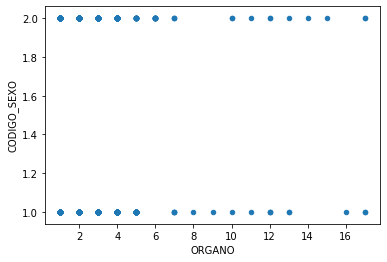

In [44]:
#figure.savefig('.../.jpeg')
#df_sample['ventas'] = dropna()
df_copy['ORGANO']= df_copy['ORGANO'].astype('int64')

df_copy.plot(kind='scatter',x='ORGANO',y='CODIGO_SEXO')

Text(0.5, 1.0, 'Frequency of organo')

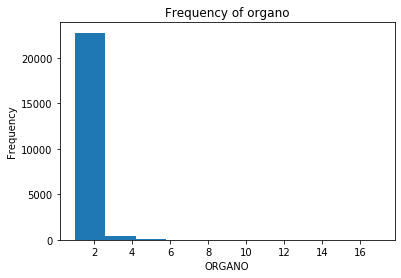

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df_copy['ORGANO'])
plt.xlabel('ORGANO')
plt.ylabel('Frequency')
plt.title('Frequency of organo')

Text(0.5, 1.0, 'Frequency of CODIGO_SEXO')

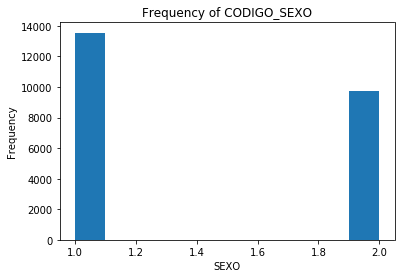

In [47]:
plt.hist(df_copy['CODIGO_SEXO'])
plt.xlabel('SEXO')
plt.ylabel('Frequency')
plt.title('Frequency of CODIGO_SEXO')

In [48]:
df_copy['ORGANO']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
23247    2
23248    2
23249    1
23250    1
23251    1
23252    2
23253    2
23254    1
23255    2
23256    1
23257    1
23258    2
23259    1
23260    1
23261    1
23262    1
23263    2
23264    1
23265    3
23266    2
23267    2
23268    1
23269    1
23270    2
23271    1
23272    2
23273    1
23274    2
23275    1
23276    1
Name: ORGANO, Length: 23277, dtype: int64

Text(0.5, 1.0, 'Box Plot of ORGANOS count')

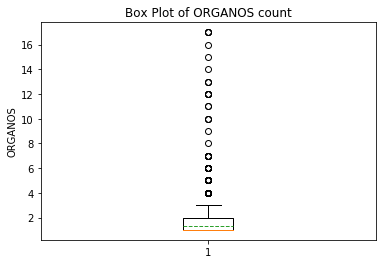

In [49]:
plt.boxplot(df_copy['ORGANO'], showmeans=True, meanline=True)
plt.ylabel('ORGANOS')
plt.title('Box Plot of ORGANOS count')